In [175]:
import cv2
import numpy as np
import pandas as pd
import pathlib
from PIL import Image 

import joblib

from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

Accesing the Data

In [117]:
dataset = pathlib.Path("Dataset")
dataset

WindowsPath('Dataset')

Finding the Total Images in the dataset of all three Classes


In [118]:
total_Images = len(list(dataset.glob('*/*.jpg')))
print(total_Images)

391


500 Notes

In [119]:
five_100 = list(dataset.glob('500/*'))
len(five_100)

177

1000 Note

In [99]:
thousand = list(dataset.glob('1000/*'))
len(thousand)

147

5000 Note

In [120]:
five_1000 = list(dataset.glob('5000/*'))
len(five_1000)

68

Showing an Example Image from Dataset

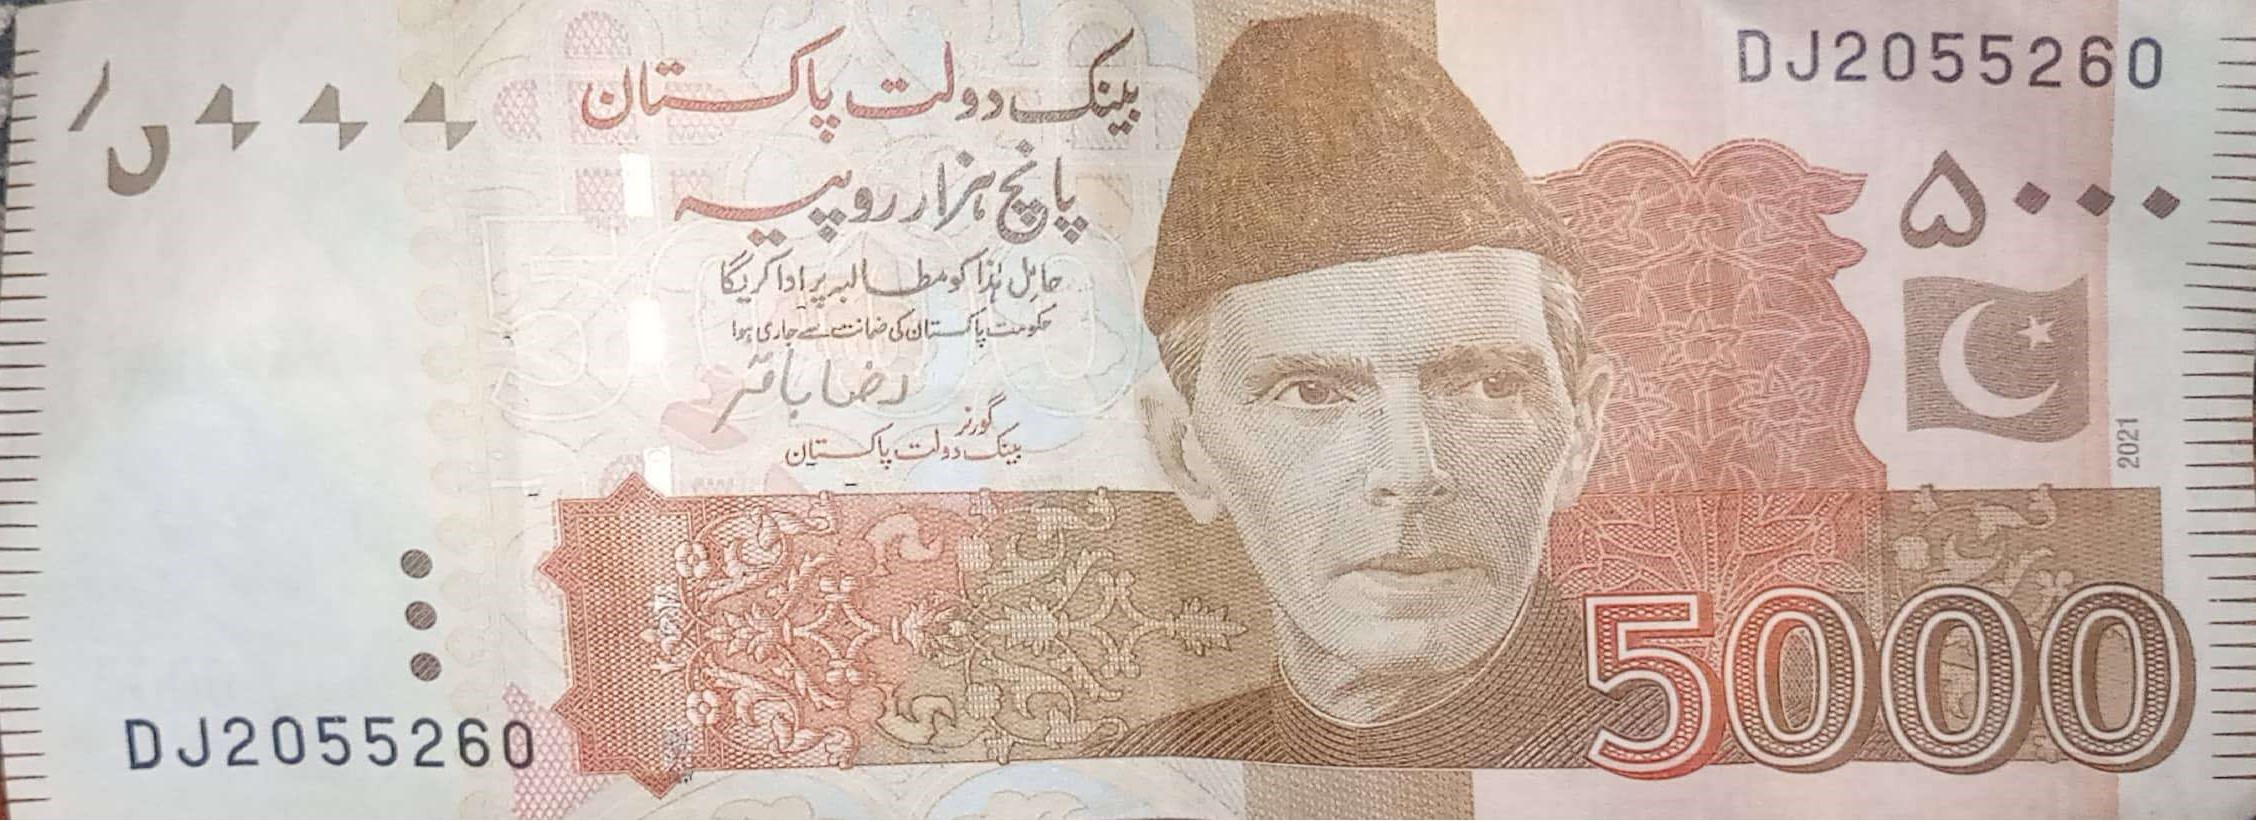

In [122]:
Image.open(str(five_1000[1]))

Finding the Size of Image and then Resizing the Images

In [123]:
currency_images_dict = {
    '500:Five_hundred': list(dataset.glob('500/*')),
    '1000:Thousand': list(dataset.glob('1000/*')),
    '5000:Five_thousand': list(dataset.glob('5000/*')),
}

In [126]:
img = cv2.imread(str(currency_images_dict['500:Five_hundred'][0]))
img.shape

(702, 1607, 3)

### Extracting Features through HOG and SIFT.

In [127]:
# Function to extract SIFT features from an image
def extract_sift_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors.flatten() if descriptors is not None else None

In [128]:
# Function to extract HOG features from an image
def extract_hog_features(image):
    # image = cv2.imread(str(image))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features, _ = hog(gray, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), block_norm='L2-Hys', visualize=True)
    return features

In [144]:
sift_features = []
hog_features = []
labels = []
combined_feature = 0

In [130]:
# Function to resize images
def resize_image(image, target_size=(100, 100)):
    return cv2.resize(image, target_size)

In [145]:
# Function to resize and pad or truncate features to a fixed size
def resize_and_pad_features(features, target_size=100):
    if len(features) >= target_size:
        return features[:target_size]
    else:
        pad_size = target_size - len(features)
        return np.pad(features, (0, pad_size), mode='constant', constant_values=0)

In [146]:
for label, image_paths in currency_images_dict.items():
    for image_path in image_paths:
        image = cv2.imread(str(image_path))
        image = resize_image(image, target_size=(100, 100)) 

        sift_feature = extract_sift_features(image)
        hog_feature = extract_hog_features(image)

        if sift_feature is not None and hog_feature is not None:
            sift_feature = resize_and_pad_features(sift_feature)
            hog_feature = resize_and_pad_features(hog_feature)

            combined_feature = np.concatenate((sift_feature, hog_feature))
            sift_features.append(sift_feature)
            hog_features.append(hog_feature)
            labels.append(label)

In [149]:
# Convert the lists to NumPy arrays
sift_features = np.array(sift_features)
hog_features = np.array(hog_features)

# Combine SIFT and HOG features
combined_features = np.concatenate((sift_features, hog_features), axis=1)

### Training DataSet Preparation 

In [164]:
currency_labels_dict = {
    '500:Five_hundred': 0,
    '1000:Thousand': 1,
    '5000:Five_thousand': 2,
}

Labels = []
for element in labels:
    if element == '500:Five_hundred':
        Labels.append(0)
    elif element == '1000:Thousand':
        Labels.append(1)
    elif element == '5000:Five_thousand':
        Labels.append(2)


### Training and Testing Data

In [150]:
combined_features = np.array(combined_features)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(combined_features, Labels, test_size=0.2, random_state=42)

### KNN Classifier

In [166]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [167]:
# Train the classifier
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [168]:
# Make predictions on the test set
predictions = knn_classifier.predict(X_test)

In [169]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6708860759493671


### SVM Classifer

In [170]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [171]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [172]:
predictions = svm_classifier.predict(X_test)

In [173]:
accuracy = accuracy_score(y_test, predictions)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.5569620253164557


In [177]:
joblib.dump(svm_classifier, 'svm_model.pkl')
joblib.dump(knn_classifier, 'knn_model.pkl')

['knn_model.pkl']